In [7]:
# Grapevine 2015 Flood Calibration

width = 100 # m
discharge = 90 # m3/s
estimated_velocity = 90/(130*1)

# rainfall = 70 # mm
# flood_time = 5 # hours
# catchment_area = 37.554828 # km 2
# total_rainfall = 

print(estimated_velocity)

0.6923076923076923


In [9]:
# Fan Areas

HP_AREA = 66240278.4
GC_AREA = 11549089.64
SO1_AREA = 6463610.781
SO2_AREA = 9642230.604

areas = {
    'HP':HP_AREA,
    'GC':GC_AREA,
    'SO1':SO1_AREA,
    'SO2':SO2_AREA
}

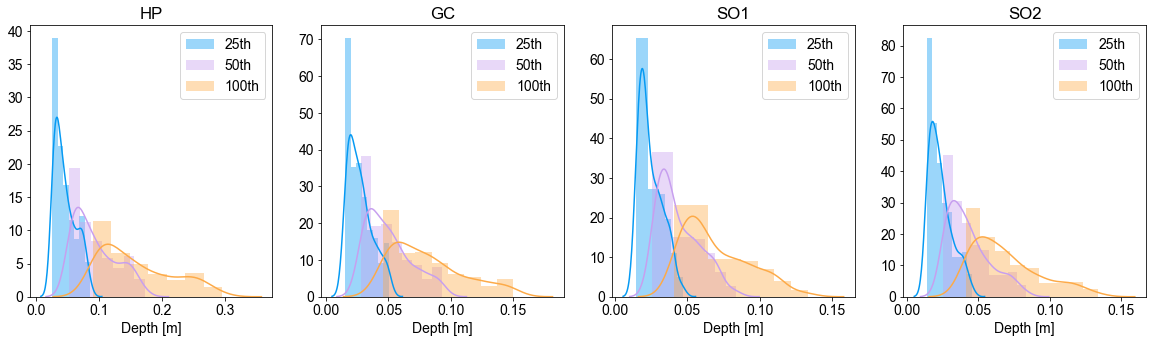

In [40]:
import numpy as np
import pickle
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns

font = {'family' : 'arial',
        'size'   : 14}

mpl.rc('font', **font)

discharges = {}

m2_to_sq_mile = 3.86102e-7

# Using Bowers 1990 regressions (for Holocene) 

field_widths = pickle.load( open( "field_widths.p", "rb" ) )

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,5), squeeze=True)

for idx,fn in enumerate(areas):
    a = areas[fn]
    Wbf = field_widths[fn]['Q3'][2] # Assume no confinement
    sq_mile = float(a)*m2_to_sq_mile
    Q25_cfs = 410*np.power(sq_mile, 0.63) # cubic feet per sec.
    Q50_cfs = 700*np.power(sq_mile, 0.68)
    Q100_cfs = 1080*np.power(sq_mile, 0.71)
    
    velocities = np.random.uniform(low=3, high=10, size=200) # m/s
    
    Q25_cms = 0.0283*Q25_cfs
    Q50_cms = 0.0283*Q50_cfs
    Q100_cms = 0.0283*Q100_cfs
    
    depths_25 = Q25_cms/velocities/Wbf
    depths_50 = Q50_cms/velocities/Wbf
    depths_100 = Q100_cms/velocities/Wbf
    
    sns.distplot(depths_25, hist=True, ax=ax[idx], color=sns.xkcd_rgb['azure'], label='Inactive')
    sns.distplot(depths_50, hist=True, ax=ax[idx], color=sns.xkcd_rgb['lavender'], label='Inactive')
    sns.distplot(depths_100, hist=True, ax=ax[idx], color=sns.xkcd_rgb['light orange'], label='Inactive')
    
    ax[idx].legend(['25th', '50th', '100th'])
    ax[idx].set_title(fn)
    ax[idx].set_xlabel('Depth [m]')
    
plt.show()

